In [23]:
import os
import cv2
import pickle
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
Dataset_dir='D:/ML/envs/cvpr/Datasets/cat_dog/'
Train_dataset=os.path.join(Dataset_dir,'train')
Test_dataset=os.path.join(Dataset_dir,'test')

In [4]:
Categories=[]
for c in os.listdir(Train_dataset):
    Categories.append(c)

print(Categories)

['cats', 'dogs']


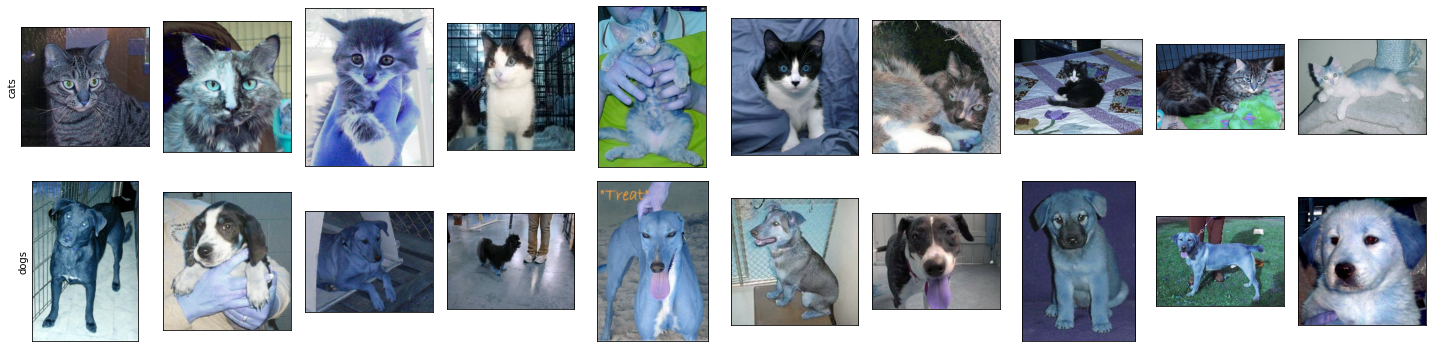

In [5]:
plt.figure(figsize=(20,5))
tmp=0
for c in Categories:
    path=os.path.join(Train_dataset,c)
    
    for img in os.listdir(path):
        img_arr=cv2.imread(os.path.join(path,img))
        plt.subplot(2,10,tmp+1)
        plt.imshow(img_arr)
        plt.xticks([])
        plt.yticks([])
        if tmp%10==0:
            plt.ylabel(c)
        tmp +=1
        if tmp%10==0:
            break

plt.tight_layout()
plt.show()

In [6]:
img_size=64
train_data=[]
for c in Categories:
    path=os.path.join(Train_dataset, c)
    class_num=Categories.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_arr=cv2.imread(os.path.join(path,img))
            img_resized=cv2.resize(img_arr,(img_size,img_size))
            train_data.append([img_resized,class_num])
        except Exception as e:
            pass

print(len(train_data))

100%|█████████████████████████████████████████████████████████████████████████████| 4006/4006 [00:24<00:00, 163.37it/s]

8005


In [7]:
img_size=64
test_data=[]
for c in Categories:
    path=os.path.join(Test_dataset, c)
    class_num=Categories.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_arr=cv2.imread(os.path.join(path,img))
            img_resized=cv2.resize(img_arr,(img_size,img_size))
            test_data.append([img_resized,class_num])
        except Exception as e:
            pass

print(len(test_data))

100%|█████████████████████████████████████████████████████████████████████████████| 1013/1013 [00:05<00:00, 171.15it/s]

2023


In [8]:
random.shuffle(train_data)
random.shuffle(test_data)

In [9]:
X_train = []
Y_train = []
for img,label in train_data:
    X_train.append (img)
    Y_train.append (label)

X_train = np.array(X_train).astype('float32').reshape (-1,64,64,3)
Y_train = np.array (Y_train)

print (X_train.shape, Y_train.shape)

(8005, 64, 64, 3) (8005,)


In [10]:
X_test = []
Y_test = []
for img,label in test_data:
    X_test.append (img)
    Y_test.append (label)

X_test = np.array(X_test).astype('float32').reshape (-1,64,64,3)
Y_test = np.array (Y_test)

print (X_test.shape, Y_test.shape)

(2023, 64, 64, 3) (2023,)


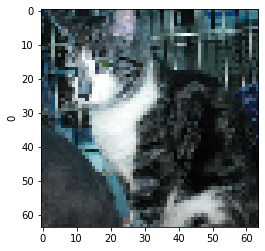

In [11]:
plt.figure()
plt.imshow(X_train[2000].astype('uint8'))
plt.ylabel(Y_train[2000])
plt.show()

In [12]:
p = open ('D:/ML/envs/cvpr/Datasets/X_train.pickle','wb')
pickle.dump(X_train, p)
p.close()

p = open ('D:/ML/envs/cvpr/Datasets/Y_train.pickle','wb')
pickle.dump(Y_train, p)
p.close()

p = open ('D:/ML/envs/cvpr/Datasets/X_test.pickle','wb')
pickle.dump(X_test, p)
p.close()

p = open ('D:/ML/envs/cvpr/Datasets/Y_test.pickle','wb')
pickle.dump(Y_test, p)
p.close()

In [13]:
pickle_in = open("D:/ML/envs/cvpr/Datasets/X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("D:/ML/envs/cvpr/Datasets//Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)

pickle_in = open("D:/ML/envs/cvpr/Datasets/X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("D:/ML/envs/cvpr/Datasets/Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")
print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_train= (8005, 64, 64, 3) Y_train= (8005,)
X_test= (2023, 64, 64, 3) Y_test= (2023,)


In [14]:
mean_rgb = np.mean(X_train, axis=(0,1,2))
print(mean_rgb)

[ 99.621765 112.3723   123.492935]


In [15]:
X_train_norm = np.empty_like(X_train)
X_test_norm = np.empty_like(X_test)

In [16]:
for i in range(len(X_train)):
    for c in range(3):
        if(c==1):
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[0]
        elif(c==2):
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[1]
        else:
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[2]
            
for i in range(len(X_test)):
    for c in range(3):
        if(c==1):
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[0]
        elif(c==2):
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[1]
        else:
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[2]

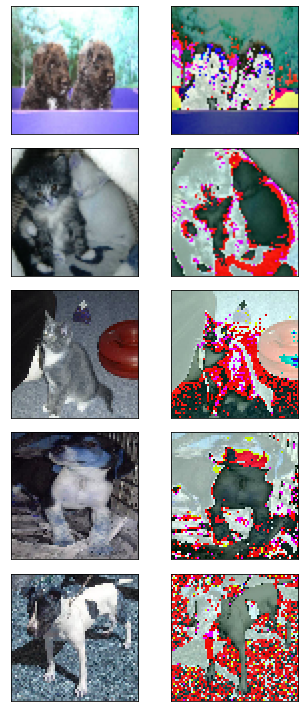

In [17]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [18]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train_norm.shape[1:]),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    layers.Dense(10),
    layers.Activation('softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 128)       0

In [19]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [24]:
cb = EarlyStopping(monitor='val_loss', min_delta=0.02, patience=3, restore_best_weights=True)

h = model.fit(x=X_train_norm, y=Y_train, 
              epochs=25, 
              validation_split=0.2,
              batch_size=128,
              callbacks=[cb]
             )

Epoch 1/25
51/51 [==============================] - 24s 286ms/step - loss: 0.7974 - accuracy: 0.5114 - val_loss: 0.6663 - val_accuracy: 0.5871
Epoch 2/25
51/51 [==============================] - 12s 227ms/step - loss: 0.6653 - accuracy: 0.6074 - val_loss: 0.6358 - val_accuracy: 0.6134
Epoch 3/25
51/51 [==============================] - 12s 228ms/step - loss: 0.6296 - accuracy: 0.6494 - val_loss: 0.6024 - val_accuracy: 0.6677
Epoch 4/25
51/51 [==============================] - 12s 228ms/step - loss: 0.5816 - accuracy: 0.6943 - val_loss: 0.5708 - val_accuracy: 0.7033
Epoch 5/25
51/51 [==============================] - 12s 229ms/step - loss: 0.5354 - accuracy: 0.7361 - val_loss: 0.9175 - val_accuracy: 0.5828
Epoch 6/25
51/51 [==============================] - 12s 228ms/step - loss: 0.5371 - accuracy: 0.7302 - val_loss: 0.5275 - val_accuracy: 0.7352
Epoch 7/25
51/51 [==============================] - 12s 229ms/step - loss: 0.4642 - accuracy: 0.7836 - val_loss: 0.5402 - val_accuracy: 0.7339

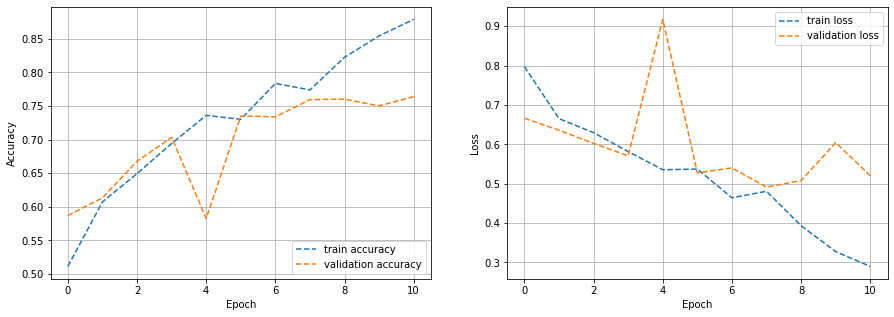

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--', label='train accuracy')
plt.plot(h.history['val_accuracy'], '--', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--', label='train loss')
plt.plot(h.history['val_loss'], '--', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [28]:
test_loss, test_acc = model.evaluate(X_test_norm, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

64/64 [==============================] - 3s 26ms/step - loss: 0.4718 - accuracy: 0.7845

Test Accuracy: 0.784478485584259

Test Loss: 0.47184041142463684
